<a href="https://colab.research.google.com/github/ahsasnagar11/ML-Learning/blob/main/Heart_disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [5]:
df = pd.read_csv('heart.csv')


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
from sklearn.model_selection import train_test_split

X,y = df.drop('target', axis=1),df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.4,random_state=9)


In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train ,y_train)


RandomForestClassifier()

In [9]:
from numpy import gradient
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()


gradient.fit(X_train ,y_train)

GradientBoostingClassifier()

In [10]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()


nb_clf.fit(X_train ,y_train)


GaussianNB()

scale sensitive

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [18]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train)


SVC()

In [19]:
forest.score(X_test,y_test)

0.9853658536585366

In [20]:
gradient.score(X_test,y_test)

0.9707317073170731

In [21]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [23]:
knn.score(X_test_scaled,y_test)

0.8536585365853658

In [24]:
log.score(X_test_scaled,y_test)

0.8731707317073171

In [25]:
svc.score(X_test_scaled,y_test)

0.9341463414634147

In [26]:
from sklearn.metrics import recall_score

y_pred = forest.predict(X_test)
print('forest', recall_score(y_test,y_pred))

forest 0.9859154929577465


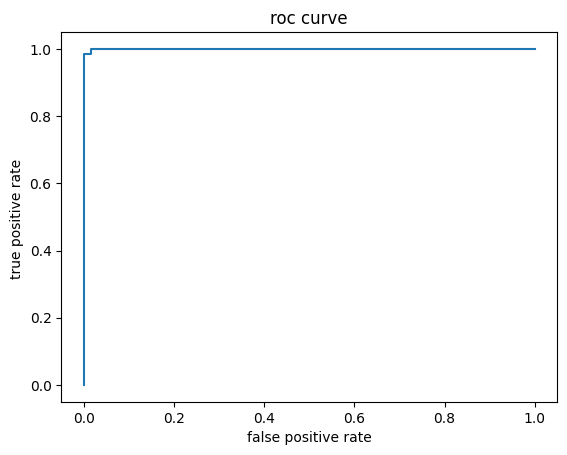

np.float64(0.999785515121184)

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.title('roc curve')
plt.show()
roc_auc_score(y_test,y_probs)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


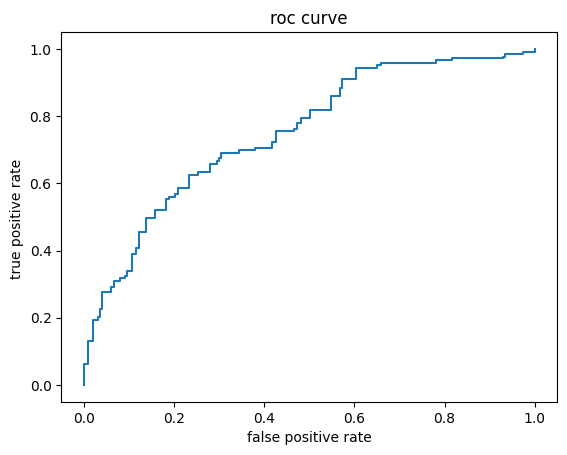

np.float64(0.7505064226305379)

In [34]:
y_probs = log.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.title('roc curve')
plt.show()
roc_auc_score(y_test,y_probs)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


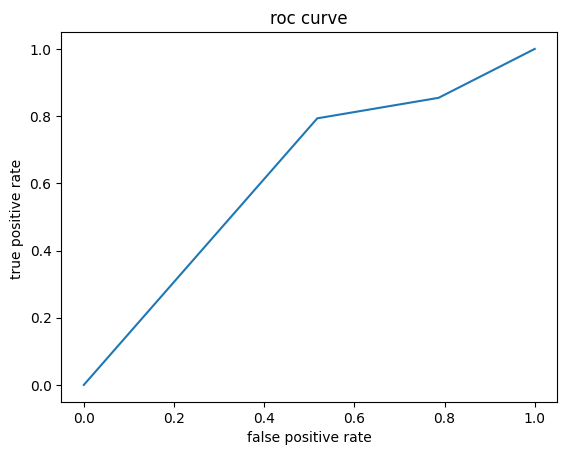

np.float64(0.624758704511332)

In [35]:
y_probs = knn.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.title('roc curve')
plt.show()
roc_auc_score(y_test,y_probs)

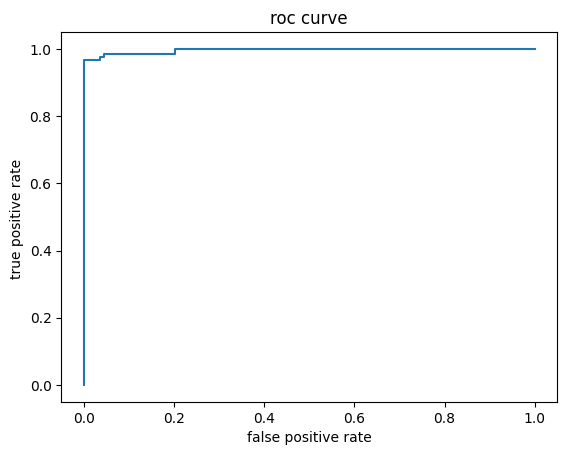

np.float64(0.996377588713329)

In [36]:
y_probs = gradient.predict_proba(X_test)[:, 1]

fpr,tpr,threshold = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.title('roc curve')
plt.show()
roc_auc_score(y_test,y_probs)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

forest1 = RandomForestClassifier(n_jobs=-1, random_state=9)

search = RandomizedSearchCV(
    forest1,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c637f1b1400>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c6383674440>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c637f1b2150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c63833bdbb0>},
                   verbose=1)

In [54]:
best_forest = search.best_estimator_
best_forest

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=317,
                       n_jobs=-1, random_state=9)

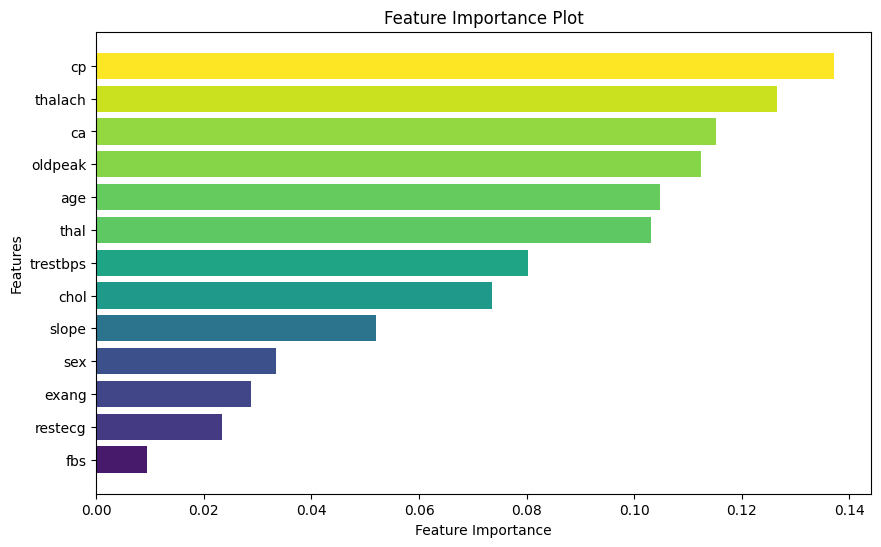

In [55]:
import numpy as np
import matplotlib.pyplot as plt

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_


sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]


colors = plt.cm.viridis(sorted_importances / max(sorted_importances))


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


In [56]:
best_forest.score(X_test,y_test)

0.9853658536585366